In [1]:
import pandas
pandas.set_option('display.max_columns', None)  # or 1000
pandas.set_option('display.max_rows', None)  # or 1000
pandas.set_option('display.max_colwidth', None)  # or 199
import pickle
import os

%reload_ext autoreload
%autoreload 2

from pyBenchmark import loadPickle, data_to_df, eliminate_blkSize_by_max, plot_data

In [3]:
# okay now load data
data = loadPickle(filepath='../mrhs_lanes.pickle')
print(data)
df = data_to_df({'mrhs_lanes': data})
# df.index.name = "Output"
# df.columns.name = "Bench params"
display(df)

{('realF', 32, 1, 9999): {(4, 4, 4, 4): {'task': 'stencil_lanes', 'mu': 0, 'isForward': 'true', 'T': 'realF', 'sizeof_T': 4, 'N': 32, 'numRHS': 1, 'grid': (4, 4, 4, 4), 'numSites': 256, 'blkSize': 999, 'time(us)': 204.91, 'srhs_bw(GBs)': 5.43708, 'mrhs_bw(GBs)': 5.43708}, (4, 4, 8, 8): {'task': 'stencil_lanes', 'mu': 0, 'isForward': 'true', 'T': 'realF', 'sizeof_T': 4, 'N': 32, 'numRHS': 1, 'grid': (4, 4, 8, 8), 'numSites': 1024, 'blkSize': 999, 'time(us)': 198.72, 'srhs_bw(GBs)': 22.4258, 'mrhs_bw(GBs)': 22.4258}, (8, 8, 8, 8): {'task': 'stencil_lanes', 'mu': 0, 'isForward': 'true', 'T': 'realF', 'sizeof_T': 4, 'N': 32, 'numRHS': 1, 'grid': (8, 8, 8, 8), 'numSites': 4096, 'blkSize': 999, 'time(us)': 206.76, 'srhs_bw(GBs)': 86.2149, 'mrhs_bw(GBs)': 86.2149}, (16, 16, 16, 16): {'task': 'stencil_lanes', 'mu': 0, 'isForward': 'true', 'T': 'realF', 'sizeof_T': 4, 'N': 32, 'numRHS': 1, 'grid': (16, 16, 16, 16), 'numSites': 65536, 'blkSize': 999, 'time(us)': 268.5, 'srhs_bw(GBs)': 1062.24, '

target        stencil_lanes                                                  \
T                     realF                                                   
N                       32                                                    
numRHS                   1                                                    
blkSize                9999                                                   
grid           (4, 4, 4, 4)   (4, 4, 8, 8)   (8, 8, 8, 8)  (16, 16, 16, 16)   
result                                                                        
task          stencil_lanes  stencil_lanes  stencil_lanes     stencil_lanes   
mu                        0              0              0                 0   
isForward              true           true           true              true   
T                     realF          realF          realF             realF   
sizeof_T                  4              4              4                 4   
N                        32             32             32                32   
numRHS                    1              1              1                 1   
grid           (4, 4, 4, 4)   (4, 4, 8, 8)   (8, 8, 8, 8)  (16, 16, 16, 16)   
numSites                256           1024           4096             65536   
blkSize                 999            999            999               999   
time(us)             204.91         198.72         206.76             268.5   
srhs_bw(GBs)        5.43708        22.4258        86.2149           1062.24   
mrhs_bw(GBs)        5.43708        22.4258        86.2149           1062.24   

target                                                                       \
T                                                                             
N                                                                             
numRHS                   12                                                   
blkSize                9999                                                   
grid           (4, 4, 4, 4)   (4, 4, 8, 8)   (8, 8, 8, 8)  (16, 16, 16, 16)   
result                                                                        
task          stencil_lanes  stencil_lanes  stencil_lanes     stencil_lanes   
mu                        0              0              0                 0   
isForward              true           true           true              true   
T                     realF          realF          realF             realF   
sizeof_T                  4              4              4                 4   
N                        32             32             32                32   
numRHS                   12             12             12                12   
grid           (4, 4, 4, 4)   (4, 4, 8, 8)   (8, 8, 8, 8)  (16, 16, 16, 16)   
numSites                256           1024           4096             65536   
blkSize                 999            999            999               999   
time(us)             202.02         201.46         202.29            265.49   
srhs_bw(GBs)        66.1783        265.449        1057.44           12891.5   
mrhs_bw(GBs)         9.0833        36.4342        145.139           1769.42   

target                                                                       \
T                                                                             
N                                                                             
numRHS                   24                                                   
blkSize                9999                                                   
grid           (4, 4, 4, 4)   (4, 4, 8, 8)   (8, 8, 8, 8)  (16, 16, 16, 16)   
result                                                                        
task          stencil_lanes  stencil_lanes  stencil_lanes     stencil_lanes   
mu                        0              0              0                 0   
isForward              true           true           true              true   
T                     realF          realF      

<AxesSubplot: xlabel='T'>

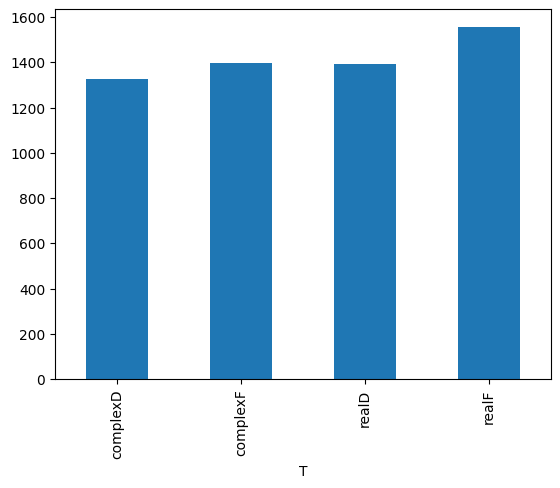

In [45]:
# use .loc to access the desired value of axis 0 e.g. srhs_bw or mrhs_bw
# use .xs function to access data by level name (very nice :) )
srhs_series = df.loc['srhs_bw(GBs)', ].xs('stencil_blas', level='target').xs('(16, 16, 16, 16)', level='grid').xs(64, level='N').xs(60, level='numRHS')

dataset = eliminate_blkSize_by_max(srhs_series)
dataset.plot(kind='bar')

In [43]:
selectors = {'grid': '(8, 8, 8, 8)', 'T': 'realF', 'target': 'stencil_blas', 'numRHS': 60}
plot_data(df=df, ax=None, xlabel='N', valuelabel='srhs_bw(GBs)', selectors=selectors)

TypeError: plot_data() got an unexpected keyword argument 'xlabel'